
2. Згорткові нейронні мережі

Вирішіть завдання класифікації зображень за допомогою згорткової (convolutional) нейромережі двома способами

In [161]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping


In [162]:
labels = pd.read_csv('Road_signs\labels.csv')

train_path = "Road_signs/DATA"
test_path = "Road_signs/TEST"

In [163]:
class_folders =  os.listdir(train_path)

image_counts = {}

for class_folder in class_folders:
    path = os.path.join(train_path, class_folder)

    # Count the number of images in the folder
    image_count = len(os.listdir(path))

    # Get the class number from the name directory
    class_number_train = class_folders.index(class_folder)

    # Save the number of images to the dictionary
    image_counts[class_folder] = image_count

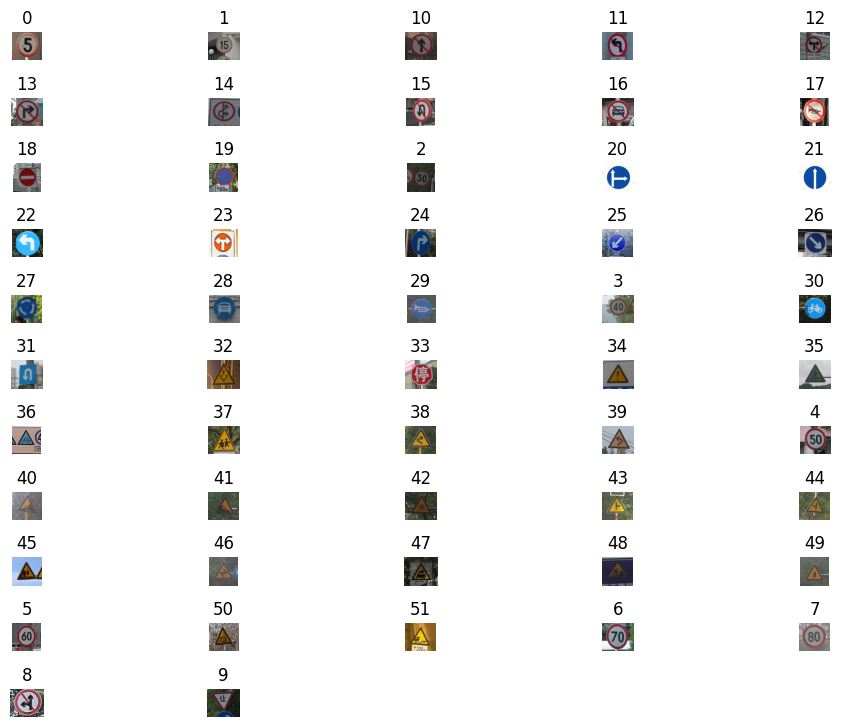

In [164]:
plt.figure(figsize=(10, 10))

# Loop through each subfolder
for i, folder in enumerate(class_folders):
    path = os.path.join(train_path, folder)
    
    # Set subplot index
    plt.subplot(15, 5, i+1)
    
    # Loop through each file in the directory
    for j, img in enumerate(os.listdir(path)):
        # Make sure to display only a single image per folder
        if j >= 1:
            break
        
        img_array = cv2.imread(os.path.join(path,img))
        
        # Show image
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.title(folder)
        plt.axis('off')

# Set space between rows and columns
plt.subplots_adjust(hspace=5, wspace=0.5)
plt.tight_layout()
plt.show()

In [165]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest',
    validation_split=0.2,
    )

In [176]:
train_images = train_generator.flow_from_directory(train_path,
                                                   target_size=(128, 128),
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   color_mode='rgb',
                                                   subset='training'
                                                  )

val_images = train_generator.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 class_mode='categorical',
                                                 batch_size=32,
                                                 color_mode='rgb',
                                                 subset='validation'
                                                )

test_images = train_generator.flow_from_directory(test_path,
                                                   target_size=(128, 128),
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   color_mode='rgb'
                                                  )

Found 4571 images belonging to 52 classes.
Found 1112 images belonging to 52 classes.
Found 433 images belonging to 52 classes.


In [167]:
print(train_images.class_indices)
num_classes = len(train_images.class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '6': 48, '7': 49, '8': 50, '9': 51}


а) навчить мережу з нуля (from scratch)

In [168]:
num_classes = len(train_images.class_indices)

model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [169]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_images, epochs=25, validation_data=val_images, callbacks=[early_stopping])

Epoch 1/25


e:\Labs\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - accuracy: 0.1284 - loss: 3.5705 - val_accuracy: 0.2770 - val_loss: 2.6587
Epoch 2/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.2969 - loss: 2.6745 - val_accuracy: 0.4083 - val_loss: 2.0903
Epoch 3/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.4199 - loss: 2.1052 - val_accuracy: 0.5189 - val_loss: 1.7046
Epoch 4/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 112ms/step - accuracy: 0.4906 - loss: 1.7802 - val_accuracy: 0.5701 - val_loss: 1.4381
Epoch 5/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.5508 - loss: 1.5277 - val_accuracy: 0.6412 - val_loss: 1.1923
Epoch 6/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.5907 - loss: 1.3495 - val_accuracy: 0.6817 - val_loss: 1.0497
Epoch 7/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.6344 - loss: 1.2031 - val_accuracy: 0.7338 - val_loss: 1.0009
Epoch 8/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.6465 - loss: 1.1260 - val

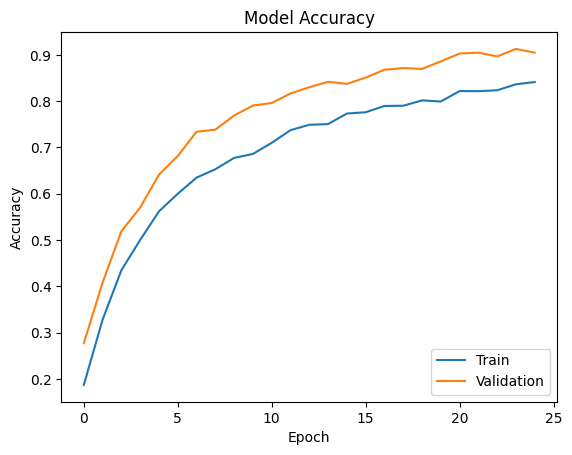

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [179]:
test_loss, test_accuracy = model.evaluate(test_images)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.8027 - loss: 1.0102
Test Loss: 0.8973396420478821
Test Accuracy: 0.8244803547859192


б) застосуйте перенесення навчання (transfer learning from pre-trained weights)

In [171]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [172]:
transferred_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
transferred_model.trainable = False

model_transfer = Sequential([
    transferred_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

In [175]:
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model_transfer.fit(train_images, epochs=25, validation_data=val_images, callbacks=[early_stopping])


Epoch 1/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 470ms/step - accuracy: 0.2442 - loss: 3.0969 - val_accuracy: 0.6637 - val_loss: 1.4182
Epoch 2/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 468ms/step - accuracy: 0.5756 - loss: 1.6006 - val_accuracy: 0.7743 - val_loss: 0.9798
Epoch 3/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 466ms/step - accuracy: 0.6576 - loss: 1.2095 - val_accuracy: 0.8399 - val_loss: 0.7182
Epoch 4/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 459ms/step - accuracy: 0.7458 - loss: 0.9069 - val_accuracy: 0.8516 - val_loss: 0.5538
Epoch 5/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 468ms/step - accuracy: 0.7555 - loss: 0.8420 - val_accuracy: 0.8876 - val_loss: 0.4477
Epoch 6/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 472ms/step - accuracy: 0.7854 - loss: 0.7364 - val_accuracy: 0.9200 - val_loss: 0.3848
Epoch 7/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 464ms/step - accuracy: 0.8117 - loss: 0.6318 - val_accuracy: 0.9173 - val_loss: 0.3421
Epoch 8/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 461ms/step - accuracy: 0.8114 - loss: 0

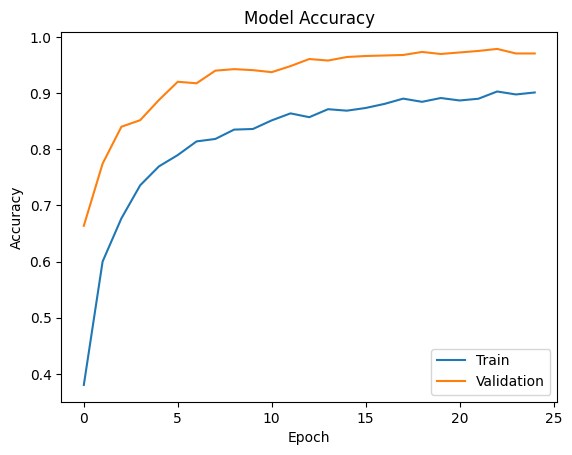

In [177]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [178]:
test_loss, test_accuracy = model_transfer.evaluate(test_images)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

e:\Labs\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.8298 - loss: 0.5015
Test Loss: 0.496368408203125
Test Accuracy: 0.8452655673027039
